In [232]:
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import time

import tushare as tscn
import time
import sys
from datetime import date

import warnings
warnings.simplefilter("ignore")
import os
#os.chdir(r'E:\SR\REITs')

% matplotlib inline

In [16]:
url_Nyse = 'https://raw.githubusercontent.com/derrickfwang/Stock_Related_Scripts/master/NYSE.csv'
url_Nsdq = 'https://raw.githubusercontent.com/derrickfwang/Stock_Related_Scripts/master/NASDAQ.csv'
url_Amex = 'https://raw.githubusercontent.com/derrickfwang/Stock_Related_Scripts/master/AMEX.csv'
Nyse = pd.read_csv(url_Nyse, index_col=0)
Nsdq = pd.read_csv(url_Nsdq, index_col=0)
Amex = pd.read_csv(url_Amex, index_col=0)

In [17]:
selectedCols = ['Name', 'MarketCap', 'IPOyear', 'Sector', 'industry']
StockList = pd.concat([Nyse[selectedCols], Nsdq[selectedCols], Amex[selectedCols]], axis=0).reset_index()

In [23]:
# define the functions

def getUsStock(US_Stock, start, end):
    sp500 = yf.download('^GSPC', start, end)
    sp500.reset_index(inplace=True, drop=False)
    sp500 = sp500.rename(columns = {'Adj Close':'Sp500'})
    
    UsStock = yf.download(US_Stock, start, end)
    UsStock.reset_index(inplace=True, drop=False)
    UsStock = UsStock.rename(columns = {'Adj Close':US_Stock})
    
    US = pd.merge(sp500[['Date','Sp500']], UsStock[['Date',US_Stock]], on = 'Date', how = 'left')
    
    return US

def drawUsStocks(Merged, ticker):
    try:
        StockInfo = StockList[StockList['Symbol'] == ticker]
        StockInfo = StockInfo.reset_index(drop=True)
        print(StockInfo['Name'][0],'\t', StockInfo['industry'][0])
    except:
        pass
    
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Merged['Date'], Merged['Sp500'])
    ax1.set_ylabel('SP500', fontsize = 12)
    plt.legend(loc = 'upper left')
    plt.grid()
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.plot(Merged['Date'], Merged[ticker], color = 'grey', linestyle='dashed')

    #ax2.set_ylim([0, Rst['Volume'].max() *2])
    ax2.set_ylabel( ticker, fontsize = 12)
    plt.legend()
    


def getCnStock(CN_Stock, start, end):
    
    hs = tscn.get_hist_data('sh', start=start, end = end)
    hs = hs.sort_index()
    hs.reset_index(inplace=True, drop=False)
    hs['date'] = pd.to_datetime(hs['date'])
    hs = hs.rename(columns = {'close':'Sh50', 'date':'Date'})

    CnStock = tscn.get_hist_data(CN_Stock, start=start, end = end)
    CnStock = CnStock.sort_index()
    CnStock.reset_index(inplace=True, drop=False)
    CnStock['date'] = pd.to_datetime(CnStock['date'])
    CnStock = CnStock.rename(columns = {'close':CN_Stock, 'date':'Date'})
   
    CN = pd.merge(hs[['Date','Sh50']], CnStock[['Date',CN_Stock]], on = 'Date', how = 'left')
    
    return CN

def drawUsCnStocks(Merged, ticker):
    try:
        StockInfo = StockList[StockList['Symbol'] == ticker]
        StockInfo = StockInfo.reset_index(drop=True)
        print(StockInfo['Name'][0],'\t', StockInfo['industry'][0])
    except:
        pass
    
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Merged['Date'], Merged['Sp500'])
    ax1.plot(Merged['Date'], Merged['SSEC'])
    ax1.set_ylabel('SP500 & SSEC', fontsize = 12)
    plt.legend(loc = 'upper left')
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.plot(Merged['Date'], Merged[ticker], color = 'grey', linestyle='dashed')

    #ax2.set_ylim([0, Rst['Volume'].max() *2])
    ax2.set_ylabel( ticker, fontsize = 12)
    plt.legend()
    
def getUsCnStock(US_Stock, start, end):
    
    sp500 = yf.download('^GSPC', start, end)
    sp500.reset_index(inplace=True, drop=False)
    sp500 = sp500.rename(columns = {'Adj Close':'Sp500'})
    
    UsStock = yf.download(US_Stock, start, end)
    UsStock.reset_index(inplace=True, drop=False)
    UsStock = UsStock.rename(columns = {'Adj Close':US_Stock})
    
    US = pd.merge(sp500[['Date','Sp500']], UsStock[['Date',US_Stock]], on = 'Date', how = 'left')
    
    hs = tscn.get_hist_data('sh', start=start, end = end)
    hs = hs.sort_index()
    hs.reset_index(inplace=True, drop=False)
    hs['date'] = pd.to_datetime(hs['date'])
    hs = hs.rename(columns = {'close':'SSEC', 'date':'Date'})
    
    fnlDf = pd.merge(US[['Date',US_Stock,'Sp500']], hs[['Date', 'SSEC']], on = 'Date'
                    , how = 'outer')
    
    fnlDf = fnlDf.sort_values(by='Date')

    return fnlDf

def drawUsCnStocksRelative(Merged, ticker):
    try:
        StockInfo = StockList[StockList['Symbol'] == ticker]
        StockInfo = StockInfo.reset_index(drop=True)
        print(StockInfo['Name'][0],'\t', StockInfo['industry'][0])
    except:
        pass
    
    Merged[['Sp500','SSEC',ticker]] = Merged[['Sp500','SSEC',ticker]].divide(Merged[['Sp500','SSEC',ticker]].ix[0])
    
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Merged['Date'], Merged['Sp500'])
    ax1.plot(Merged['Date'], Merged['SSEC'])
    ax1.set_ylabel('SP500 & SSEC', fontsize = 12)
    ax1.plot(Merged['Date'], Merged[ticker], color = 'grey', linestyle='dashed')
    plt.legend()
    plt.grid()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
W&T Offshore, Inc. 	 Oil & Gas Production


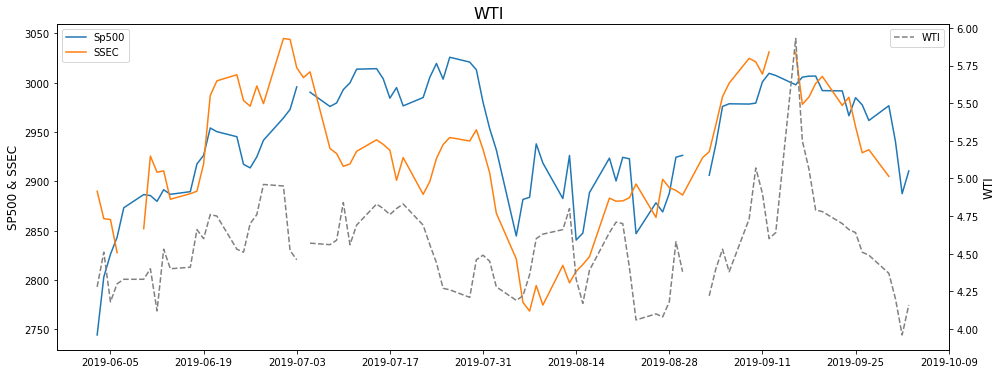

In [209]:
US_Stock = 'WTI'
start = '2019-06-01'
end = str(date.today())
df = getUsCnStock(US_Stock, start, end)
drawUsCnStocks(df, US_Stock)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
Heron Therapeutics, Inc.   	 Major Pharmaceuticals


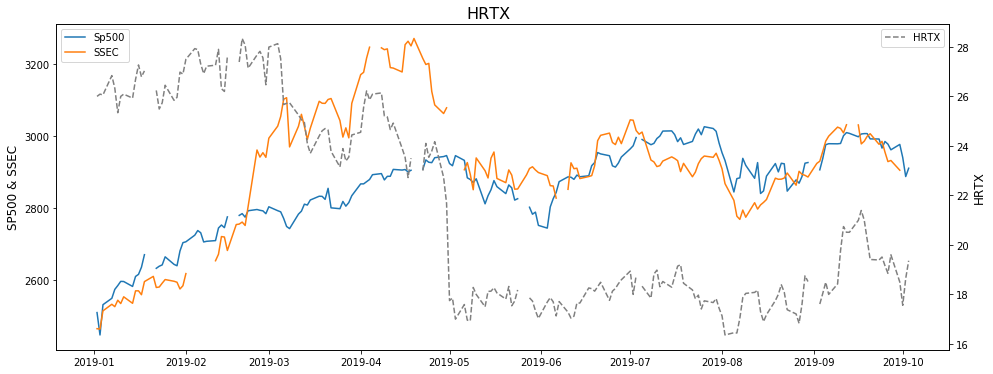

In [212]:
US_Stock = 'HRTX'
start = '2019-01-01'
end = str(date.today())
df = getUsCnStock(US_Stock, start, end)
drawUsCnStocks(df, US_Stock)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
Apple Inc. 	 Computer Manufacturing


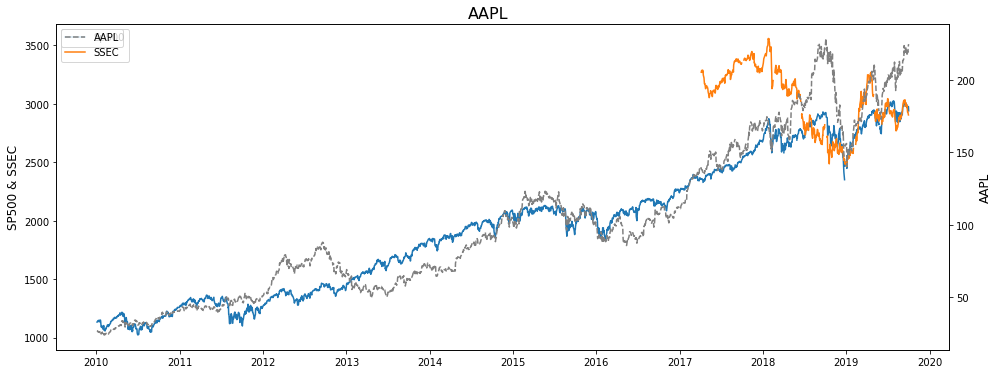

In [206]:
US_Stock = 'AAPL'
start = '2010-01-01'
end = str(date.today())
df = getUsCnStock(US_Stock, start, end)
drawUsCnStocks(df, US_Stock)

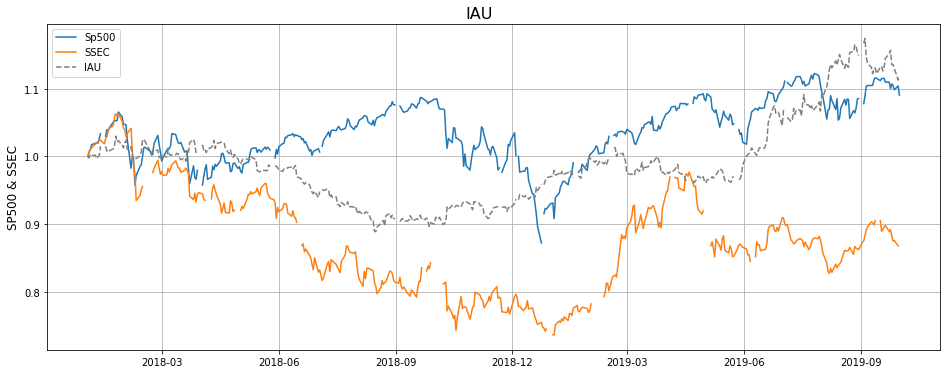

In [26]:
drawUsCnStocksRelative(df, US_Stock)

# Detailed Analysis Using AlphaVantage minute data

In [115]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from stockstats import StockDataFrame as Sdf
import time
import pandas as pd
from datetime import datetime

ts = TimeSeries(key='YDTG632CVJ4469F6', output_format='pandas')

def getDaily(Name, size):
    daily, meta_data = ts.get_daily_adjusted(symbol=Name,outputsize=size)
    
    daily = daily[daily['1. open'].notnull()]

    daily['open'] = daily['1. open'] *  daily['5. adjusted close'] /daily['4. close'] 
    daily['high'] = daily['2. high'] *  daily['5. adjusted close'] /daily['4. close']
    daily['low'] = daily['3. low'] *  daily['5. adjusted close'] /daily['4. close'] 
    daily['close'] = daily['5. adjusted close']

    
    
    daily['volume'] = daily['6. volume']

    daily = Sdf.retype(daily)
    daily['kdjd']=daily['kdjd']
    daily['kdjd_5']=daily['kdjd_5']
    daily['boll'] =daily['boll']
    daily['close_55_sma'] = daily['close_55_sma']
    daily = daily[daily['open'] > 0]
    
    daily = daily[['open', 'high', 'low', 'close','volume', 'kdjj', 'kdjd','kdjd','kdjk',
                   'close_20_sma','boll_ub', 'boll_lb','close_55_sma']]
    return daily
def minutes(Name, interval, size):
    data, meta_data = ts.get_intraday(symbol=Name,interval=interval, outputsize=size)

    columDict = {'1. open':'open', '5. volume':'volume', '2. high':'high', '4. close':'close', '3. low':'low'}
    data = data.rename(columns=columDict)
    data = data[['open', 'high', 'low', 'close','volume']]

    ssdf = Sdf.retype(data)
    data['kdjd']=ssdf['kdjd']
    data['kdjd_5']=ssdf['kdjd_5'] 
    data['boll'] =ssdf['boll']
    data['close_55_sma'] = ssdf['close_55_sma']
    data = data[['open', 'high', 'low', 'close','volume', 'kdjj', 'kdjd','kdjd','kdjk',
                 'close_20_sma','boll_ub', 'boll_lb','close_55_sma']]
    return data

def plot(data):
    plt.figure(figsize=(12.5,4),facecolor='white')
    ax1 = data['kdjj'].plot(alpha=1, color='c', rot=15)
    ax1 = data['kdjk'].plot(alpha=1, color='r', rot=15)
    ax2 = data['close'].plot(secondary_y=True,color='black')
    ax2 = data['close_20_sma'].plot(secondary_y=True,color='b',alpha=0.6)
    ax2 = data['close_55_sma'].plot(secondary_y=True,color='m',alpha=0.6)
    ax2 = data['boll_ub'].plot(secondary_y=True,color='black', alpha=0.3)
    ax2 = data['boll_lb'].plot(secondary_y=True,color='black', alpha=0.3)
    
    #ax2 = data['kdjd'].plot(secondary_y=True, alpha=1, color='g', rot=15)
    #ax2.set_ylim(1, 100)
    #ax1.xticks(rotation=45)
    plt.show()

    
def plot1(daily):
    daily['date']=pd.to_datetime(daily.index)
    ma = daily.close.rolling(20).mean()
    mstd = daily.close.rolling(20).std()
    ma50 = daily.close.rolling(50).mean()
    
    fig, ax1 = plt.subplots(figsize=(12.5, 4))
    ax2 = ax1.twinx()
    ax2.plot(daily.date, daily.close, 'k')
    ax2.plot(daily.date, ma, 'b', alpha=0.6)
    ax2.plot(daily.date, ma50, 'm', alpha=0.6)
    ax2.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

    ax1.plot(daily.date, daily.kdjk, 'g')
    ax1.plot(daily.date, daily.kdjd, 'r')
    ax1.plot(daily.date, daily.kdjj, 'c')
    #ax2.set_ylim(0, 100)
    plt.show()

def plot2(daily):
    daily['date']=pd.to_datetime(daily.index)
    ma = daily.close.rolling(20).mean()
    mstd = daily.close.rolling(20).std()
    ma50 = daily.close.rolling(50).mean()
    
    fig, ax1 = plt.subplots(figsize=(10, 3))
    ax2 = ax1.twinx()
    ax2.plot(daily.date, daily.close, 'k')
    ax2.plot(daily.date, ma, 'y', alpha=0.5)
    ax2.plot(daily.date, ma50, 'b', alpha=0.5)
    ax2.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

    ax2.set_yscale('log')
    ax1.plot(daily.date, daily.kdjk, 'g')
    ax1.plot(daily.date, daily.kdjd, 'r')
    ax1.plot(daily.date, daily.kdjj, 'c')
    #ax1.set_yscale('log')
    #ax2.set_ylim(0, 100)
    plt.show()
    
    
def stockVolatility(name):
    df1 = getDaily(name,'compact')
    df2 = df1[df1['open'] > 0]
    #df2['closePct'] = 100*(df2['open'] - df2['close']) / df2['open']
    #df2['rangePct'] = 100* (df2['high'] - df2['low']) / df2['open']
    df2['highPct'] = 100* (df2['high'] - df2['close']) / df2['close']
    df2['lowPct'] = 100* (df2['low'] - df2['close']) / df2['close']
    
    dT = df2[['highPct','lowPct']].describe()
    l = (100+ dT['lowpct']['75%'])*df2['close'][-1] / 100
    h = (100 + dT['highpct']['25%'])*df2['close'][-1] / 100 
    
    print("{0}, newest daily date: {1}".format(name, df2.index[-1]))
    print(" Daily variation: 75% between {0:.2f} and {1:.2f}".format(l, h))
    print(" 75% Theoretical gain: {0:.2f} %".format(dT['highpct']['25%'] - dT['lowpct']['75%']))    
    print("\n")
       
    
    
def getStockTrend(Name):
    start = time.time()
    print(Name)
    print(datetime.now().strftime("%Y-%m-%d %H:%M"))
    print("\n")
    
    try:
        stockVolatility(Name)
    except:
        print("can't get stats")

    try:
        daily = getDaily(Name, 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('Daily')
        plot1(daily)
        
    except:
        print("can't get daily data")
        daily=pd.DataFrame()
        pass


    try:
        start = time.time()
        OneMin = minutes(Name, '1min', 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('One Minute')
        
        df2 = OneMin
        df2['highPct'] = 100* (df2['high'] - df2['close']) / df2['close']
        df2['lowPct'] = 100* (df2['low'] - df2['close']) / df2['close']
    
        dT = df2[['highPct','lowPct']].describe()
        l = (100+ dT['lowPct']['75%'])*df2['close'][-1] / 100
        h = (100 + dT['highPct']['25%'])*df2['close'][-1] / 100 
    
        print("{0}, newest one minute date time: {1}".format(Name, df2.index[-1]))
        print(" 1 minutes variation: 75% between {0:.2f} and {1:.2f}".format(l, h))
        print(" 1 min 75% Theoretical gain: {0:.2f} %".format(dT['highPct']['25%'] - dT['lowPct']['75%']))    
        print("\n") 
        
        
        plot(OneMin)
    except:
        print("can't get one minute data")
        pass


    try:
        start = time.time()
        FiveMin = minutes(Name, '5min', 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('FiveMin')
        
        df2 = FiveMin
        df2['highPct'] = 100* (df2['high'] - df2['open']) / df2['open']
        df2['lowPct'] = 100* (df2['low'] - df2['open']) / df2['open']
    
        dT = df2[['highPct','lowPct']].describe()
        l = (100+ dT['lowPct']['75%'])*df2['open'][-1] / 100
        h = (100 + dT['highPct']['25%'])*df2['open'][-1] / 100 
    
        print("{0}, newest five minute date time: {1}".format(Name, df2.index[-1]))
        print(" 5 minutes variation: 75% between {0:.2f} and {1:.2f}".format(l, h))
        print(" 5 min 75% Theoretical gain: {0:.2f} %".format(dT['highPct']['25%'] - dT['lowPct']['75%']))    
        print("\n")         
               
        plot(FiveMin)
    except:
        print("can't get five minute data")
        pass

    try:
        start = time.time()
        FifteenMin = minutes(Name, '15min', 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('FifteenMin')
        plot(FifteenMin)
    except:
        print("can't get fifteen minute data")
        pass

RRC
2019-10-04 15:08


RRC, newest daily date: 2019-10-04
 Daily variation: 75% between 3.63 and 3.73
 75% Theoretical gain: 2.68 %


time used 1 seconds.
Daily


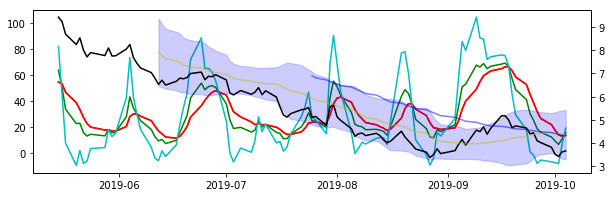

time used 1 seconds.
One Minute
RRC, newest one minute date time: 2019-10-04 16:00:00
 1 minutes variation: 75% between 3.65 and 3.65
 1 min 75% Theoretical gain: 0.13 %




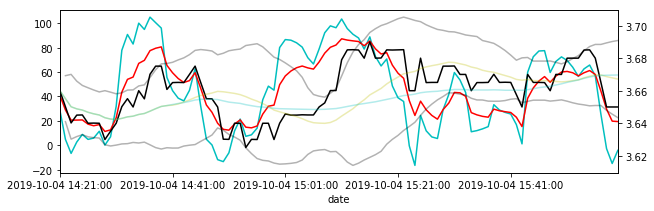

time used 1 seconds.
FiveMin
RRC, newest five minute date time: 2019-10-04 16:00:00
 5 minutes variation: 75% between 3.69 and 3.70
 5 min 75% Theoretical gain: 0.18 %




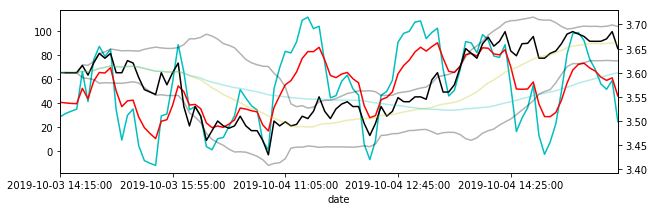

time used 1 seconds.
FifteenMin


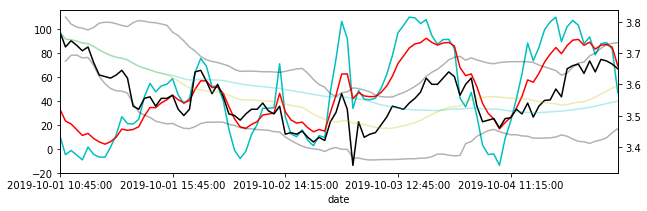

In [170]:
getStockTrend('RRC')

# Get Multiple Tickers at once

In [286]:
from datetime import date
import copy
% matplotlib inline

def getAllTickers(TickerList, startDate, endDate):
    dict_of_Series = {}
    TickerList.append('^GSPC')
    
    for ticker in list(TickerList):
        SeriesName = str(ticker) 
    
        df = yf.download(ticker, startDate, endDate)
        SeriesValue = df['Adj Close']
        dict_of_Series[SeriesName] = copy.deepcopy(SeriesValue)
    
    Rst = pd.DataFrame(dict_of_Series)
    Rst = Rst.rename(columns = {'^GSPC':'SP500'})
    #Rst.reset_index(inplace=True)
    Rst = Rst.fillna(method = 'bfill')
    return Rst
    
def plotTickers(TickerList, Rst, StartDate1):  
    Rst1 = Rst[Rst.index > StartDate1]
    Rst1 = Rst1.divide(Rst1.iloc[0])
    
    NumberOfTickers = len([t for t in TickerList if t != '^GSPC'])   
    rows =math.ceil(NumberOfTickers / 2)
    
    if rows == 1:
        rows += 1

    fig, axs = plt.subplots(rows, 2, figsize=(16, rows * 4), sharex=True, sharey=False)

    for i in range(NumberOfTickers):
        Ticker = TickerList[i]
        row  = int(np.floor(i/2))
        column = i%2
        Rst1[['SP500', Ticker]].plot(ax = axs[row, column])
        
    

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


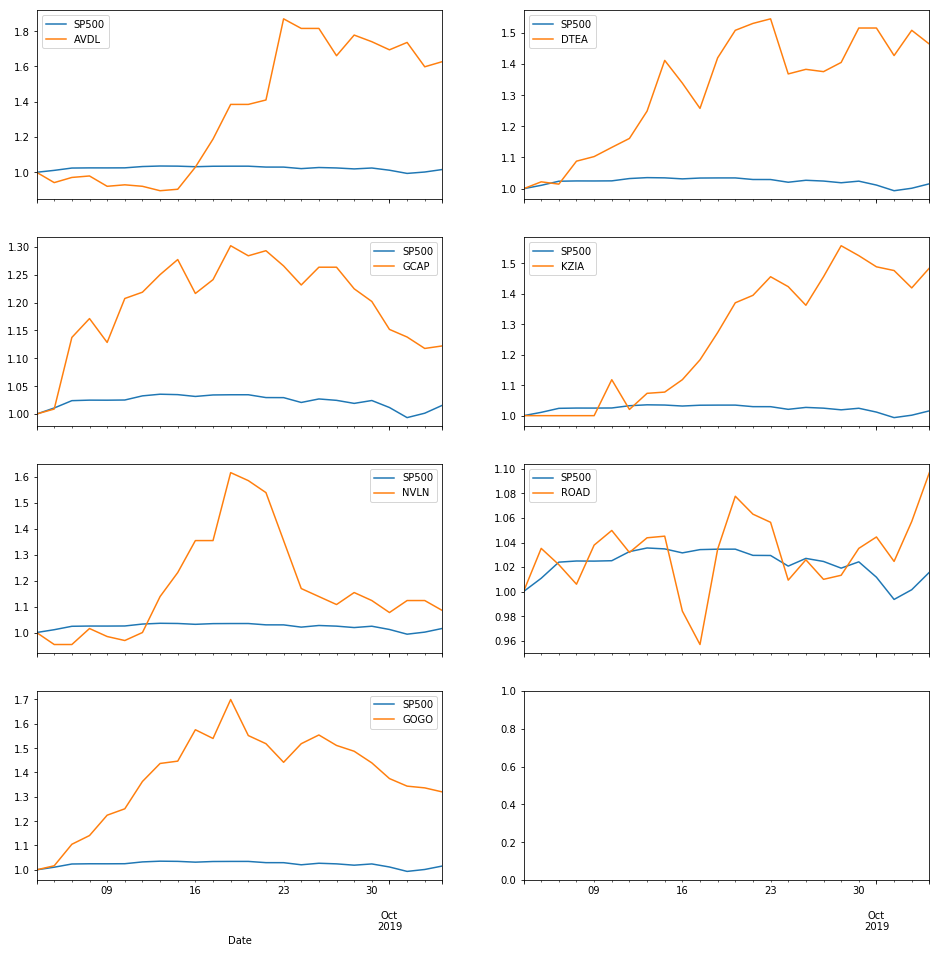

In [290]:
# Get Data
TickerList = ['AVDL','DTEA','GCAP','KZIA','NVLN','ROAD','GOGO']

startDate = '2019-09-01'
endDate = str(date.today())

Rst = getAllTickers(TickerList, startDate, endDate)
plotTickers(TickerList, Rst, StartDate1)

# Draw Curve and Bar

In [310]:
from datetime import date

def drawCurveAndBar(ticker, startDate, endDate):
    Rst = yf.download(ticker, startDate, endDate)
    Rst.reset_index(inplace=True, drop=False)
    
    Rst['PreAdjClose'] = np.NaN
    Rst['PreAdjClose'][1:len(Rst)] = Rst['Adj Close'][0:(len(Rst)-1)]
    
    Rst['UpOrDown'] = 'up'
    Rst['UpOrDown'][(Rst['Adj Close'] - Rst['PreAdjClose']) < 0 ] = 'down'

    Rst['VolumeUp'] = 0
    Rst['VolumeUp'][Rst['UpOrDown'] == 'up'] = Rst['Volume'][Rst['UpOrDown'] == 'up']
    Rst['VolumeDown'] = 0
    Rst['VolumeDown'][Rst['UpOrDown'] == 'down'] = Rst['Volume'][Rst['UpOrDown'] == 'down']
    
    fig, ax1 = plt.subplots(figsize = (12,4))
    fig.suptitle(ticker, fontsize=16, y = 0.94)
    
    ax1.plot(Rst['Date'], Rst['Adj Close'])
    ax1.set_ylabel('Adj Close', fontsize = 12)
    ax1.grid()
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.bar(Rst['Date'], Rst['VolumeUp'], color = 'green', alpha = 0.7, width =0.5)
    ax2.bar(Rst['Date'], Rst['VolumeDown'], color = 'red', alpha = 0.7, width =0.5)

    ax2.set_ylim([0, Rst['Volume'].max() *2])
    ax2.set_ylabel('Volume', fontsize = 12)
    
    return Rst

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


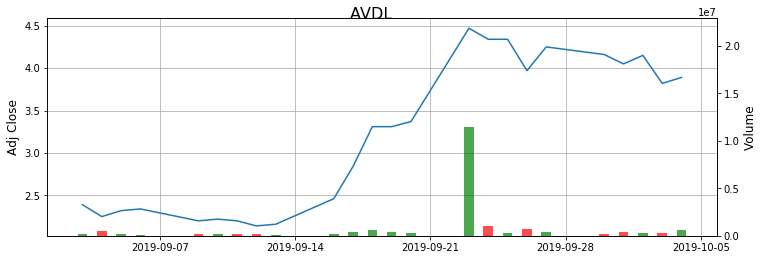

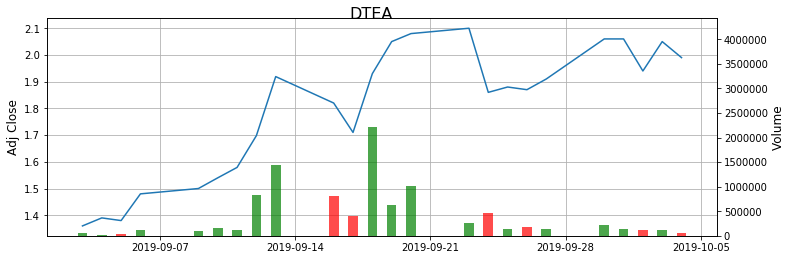

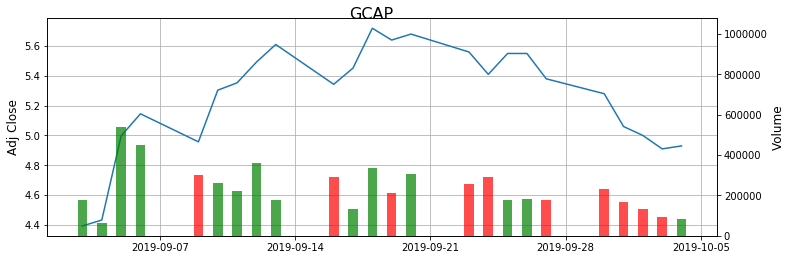

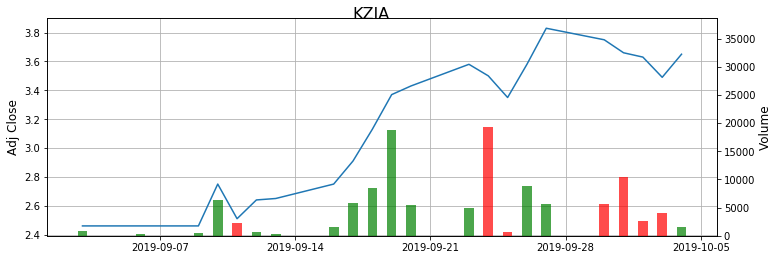

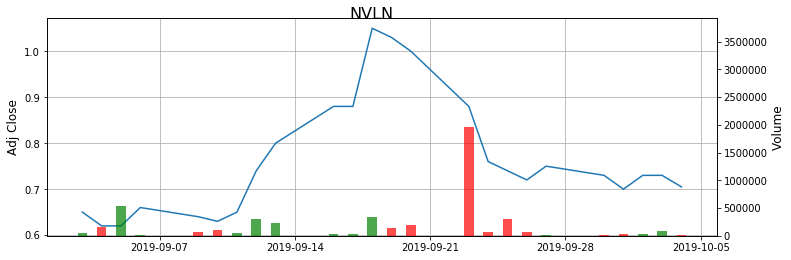

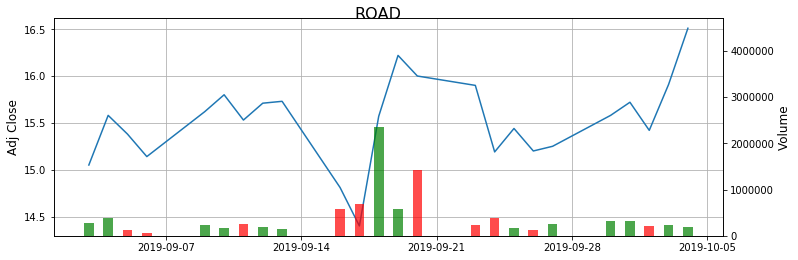

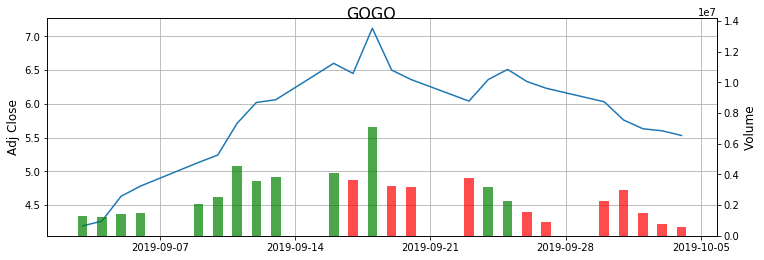

In [302]:
startDate = '2019-09-01'
endDate = str(date.today())

TickerList = ['AVDL','DTEA','GCAP','KZIA','NVLN','ROAD','GOGO']

for ticker in TickerList:
    data = drawCurveAndBar(ticker, startDate, endDate)

[*********************100%***********************]  1 of 1 downloaded


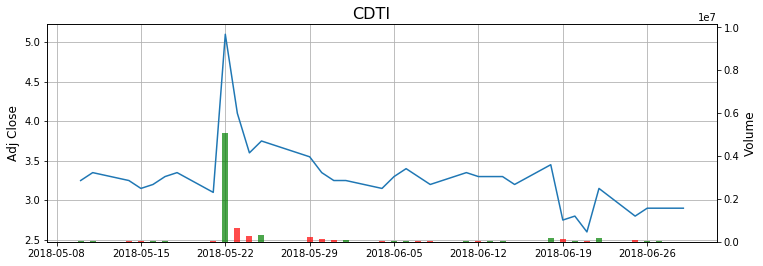

In [311]:
ticker = 'CDTI'
startDate = '2018-05-10'
endDate = '2018-06-30'
data = drawCurveAndBar(ticker, startDate, endDate)

[*********************100%***********************]  1 of 1 downloaded


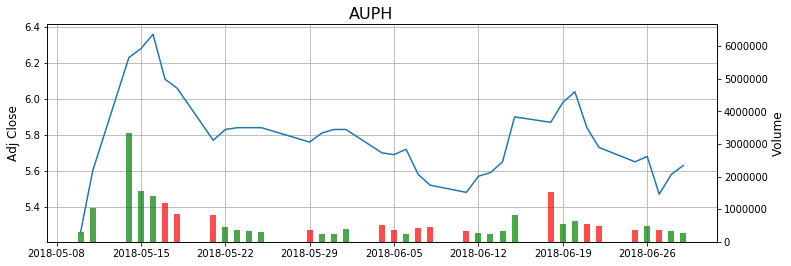

In [327]:
ticker = 'AUPH'
startDate = '2018-05-10'
endDate = '2018-06-30'
data = drawCurveAndBar(ticker, startDate, endDate)

[*********************100%***********************]  1 of 1 downloaded


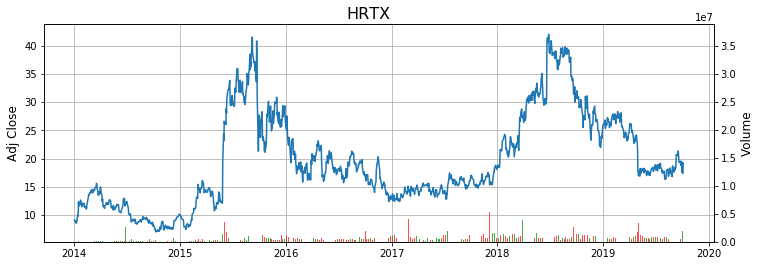

In [336]:
ticker = 'HRTX'
startDate = '2014-01-01'
#endDate = '2018-12-31'
endDate = str(date.today())
data = drawCurveAndBar(ticker, startDate, endDate)

[*********************100%***********************]  1 of 1 downloaded


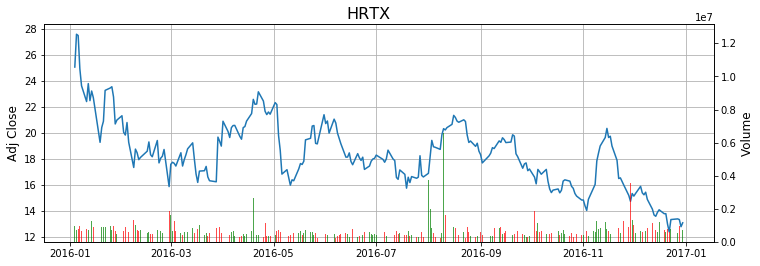

In [338]:
ticker = 'HRTX'
startDate = '2016-01-01'
endDate = '2016-12-31'
#endDate = str(date.today())
data = drawCurveAndBar(ticker, startDate, endDate)

[*********************100%***********************]  1 of 1 downloaded


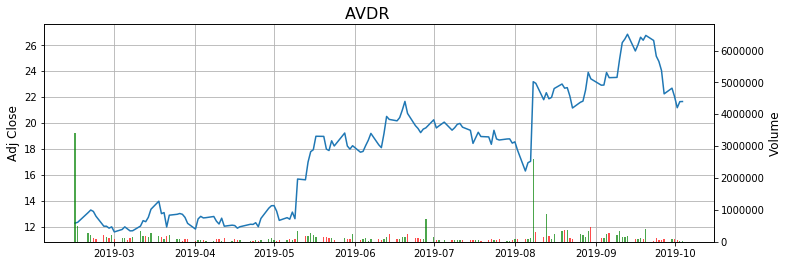

In [341]:
ticker = 'AVDR'
startDate = '2019-01-01'
endDate = '2019-12-31'
#endDate = str(date.today())
data = drawCurveAndBar(ticker, startDate, endDate)